# seaborn
- matplotlib의 기능과 스타일을 확장한 고급화 시각도구
- alias는 주로 sns 사용

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')

## 회귀선이 있는 산점도

In [ ]:
sns.set_style('darkgrid')

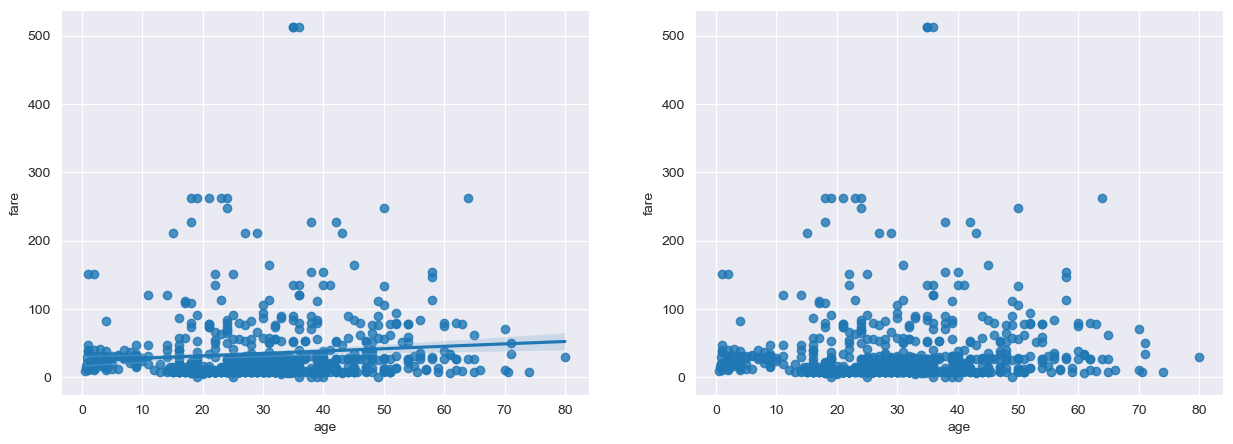

In [34]:
fig, axe = plt.subplots(1, 2, figsize=(15,5))
sns.regplot(x='age', y='fare', data=titanic, ax=axe[0]) #  회귀선 O
sns.regplot(x='age', y='fare', data=titanic, ax=axe[1], fit_reg=False) #  회귀선 X
plt.show()



##  히스토그램 / KDE(커널 밀도 그래프)

### 히스토그램 5종류

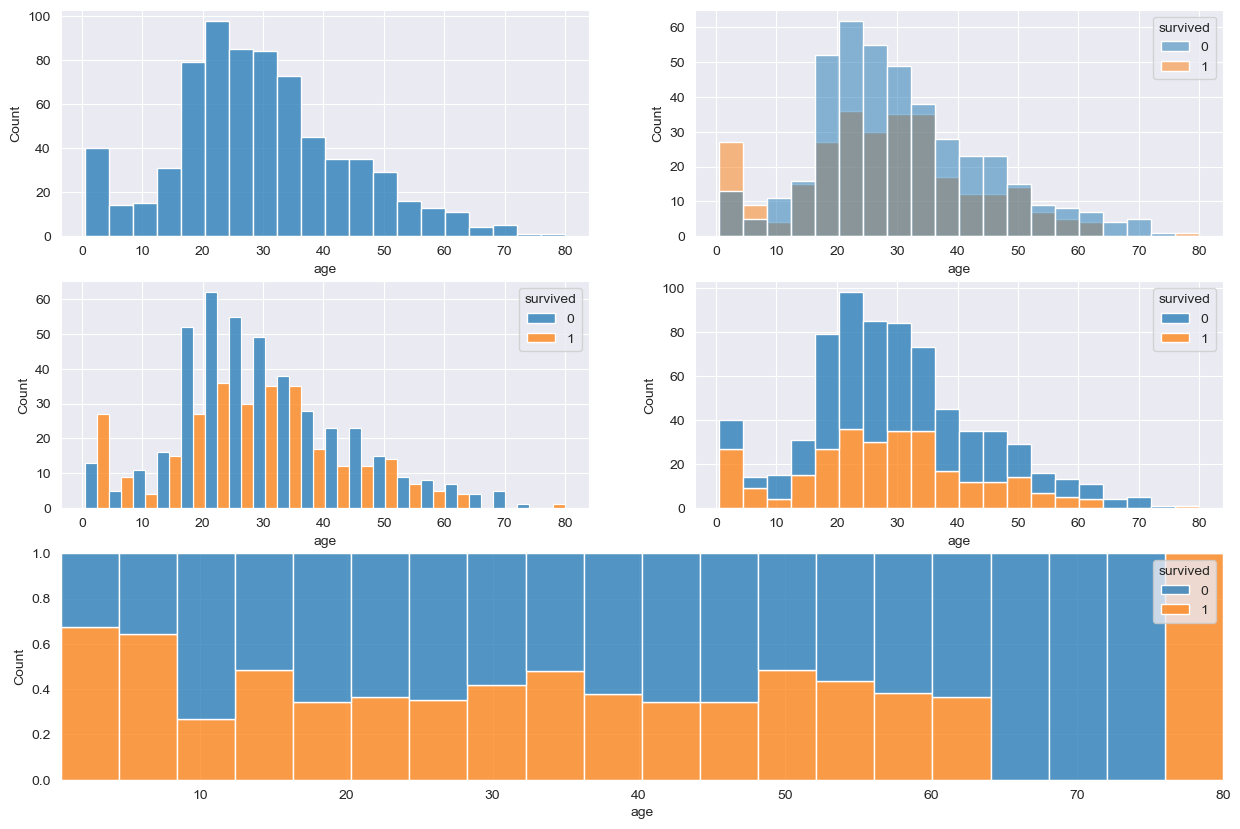

In [66]:
fig, axes = plt.subplot_mosaic(
    [ ['top_left', 'top_right', ], ['mid_left', 'mid_right'], ['bottom', 'bottom'] ],
    figsize=(15, 10)
)

sns.histplot(x='age', data=titanic, ax=axes['top_left']) 
sns.histplot(x='age', hue='survived', data=titanic, ax=axes['top_right']) 
sns.histplot(x='age', hue='survived', multiple='dodge', data=titanic, ax=axes['mid_left']) 
sns.histplot(x='age', hue='survived', multiple='stack', data=titanic, ax=axes['mid_right']) 
sns.histplot(x='age', hue='survived', multiple='fill', data=titanic, ax=axes['bottom']) 


plt.show()

### 커널밀도그래프(KDE)

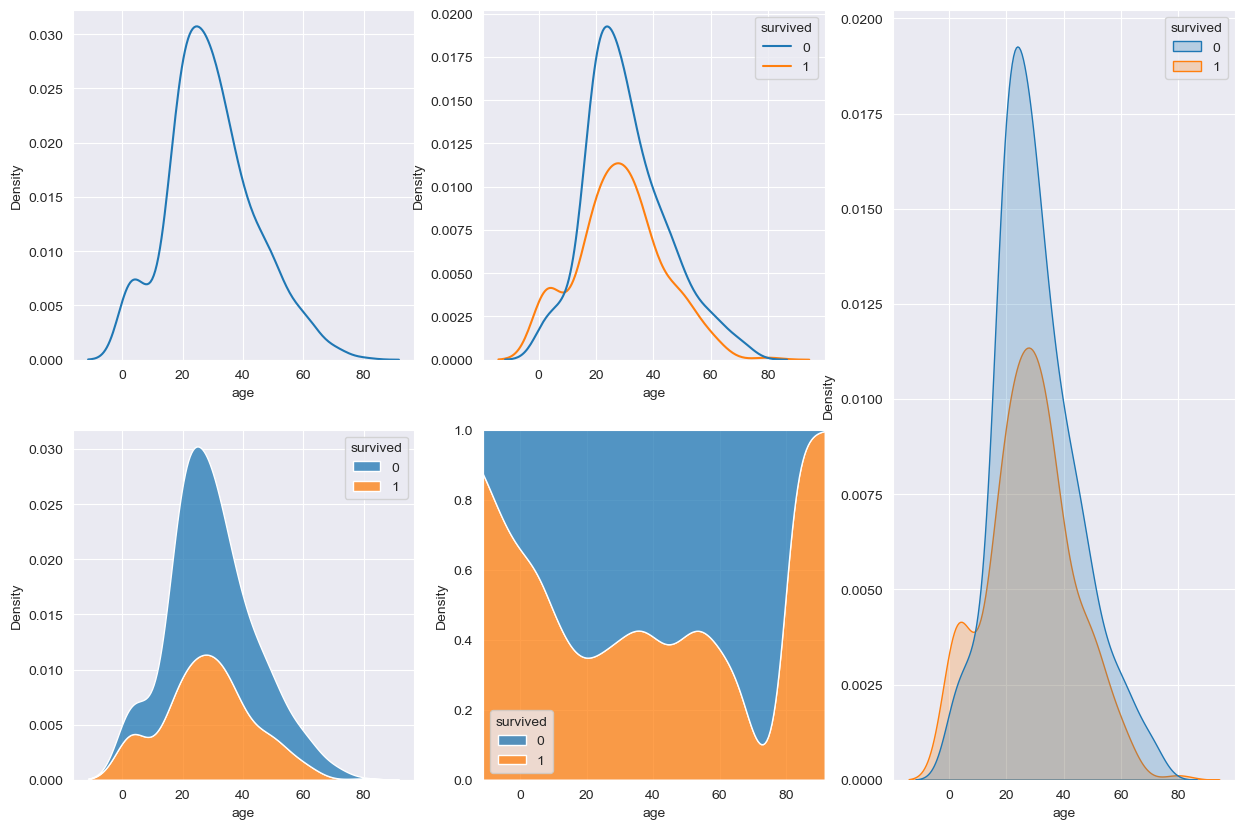

In [86]:
fig, axes = plt.subplot_mosaic(
    [ ['top_left', 'top_center', 'top_right' ], ['mid_left', 'mid_center', 'top_right'] ],
    figsize=(15, 10)
)

sns.kdeplot(x='age', data=titanic, ax=axes['top_left']) 
sns.kdeplot(x='age', hue='survived', data=titanic, ax=axes['top_center']) 
sns.kdeplot(x='age', hue='survived', fill=True, data=titanic, ax=axes['top_right']) 
sns.kdeplot(x='age', hue='survived', multiple='stack', data=titanic, ax=axes['mid_left']) 
sns.kdeplot(x='age', hue='survived', multiple='fill', data=titanic, ax=axes['mid_center']) 

plt.show()


In [ ]:
### seaborn displot : 간단 

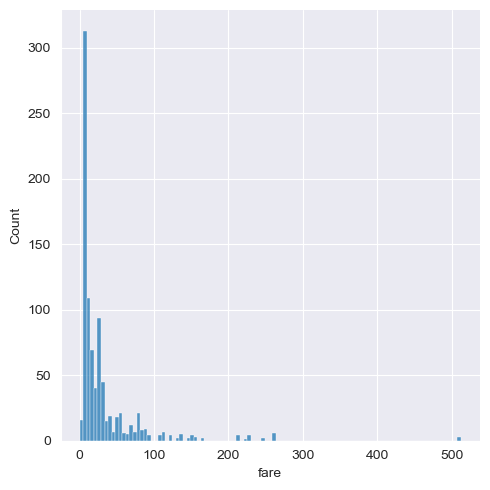

In [96]:
sns.displot(titanic['fare'], kind='hist')
plt.show()

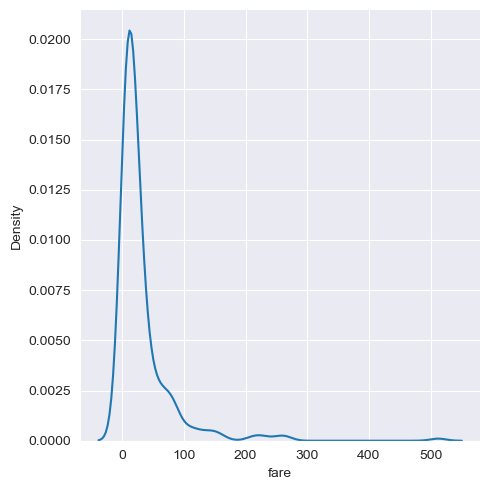

In [98]:
sns.displot(titanic['fare'], kind='kde')
plt.show()

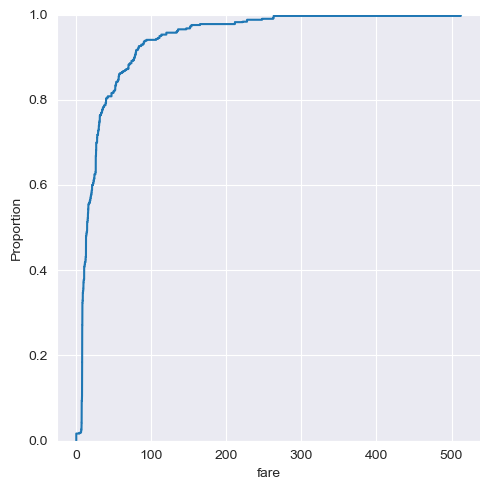

In [100]:
sns.displot(titanic['fare'], kind='ecdf')
plt.show()

In [104]:
titanic['pclass'].unique()

array([3, 1, 2], dtype=int64)

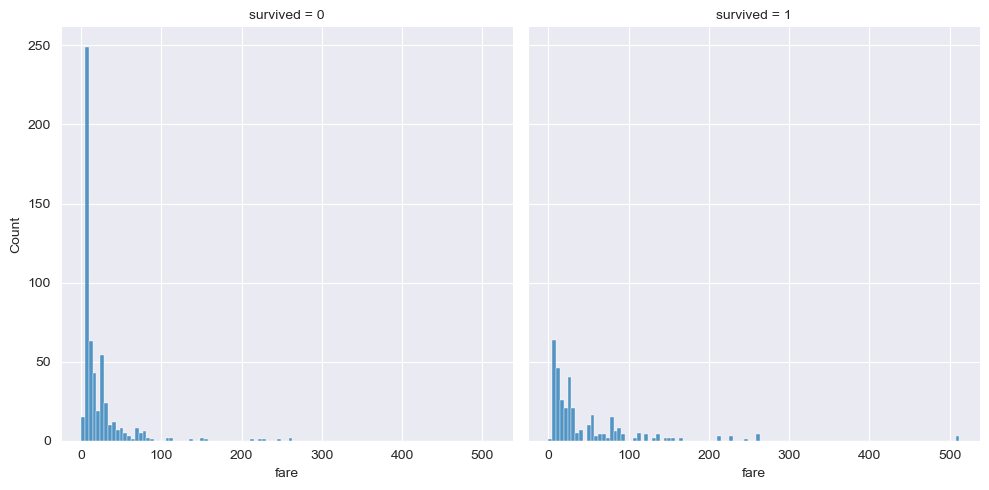

In [116]:
sns.displot(data=titanic, x='fare', col='pclass', kind='hist')
plt.show()

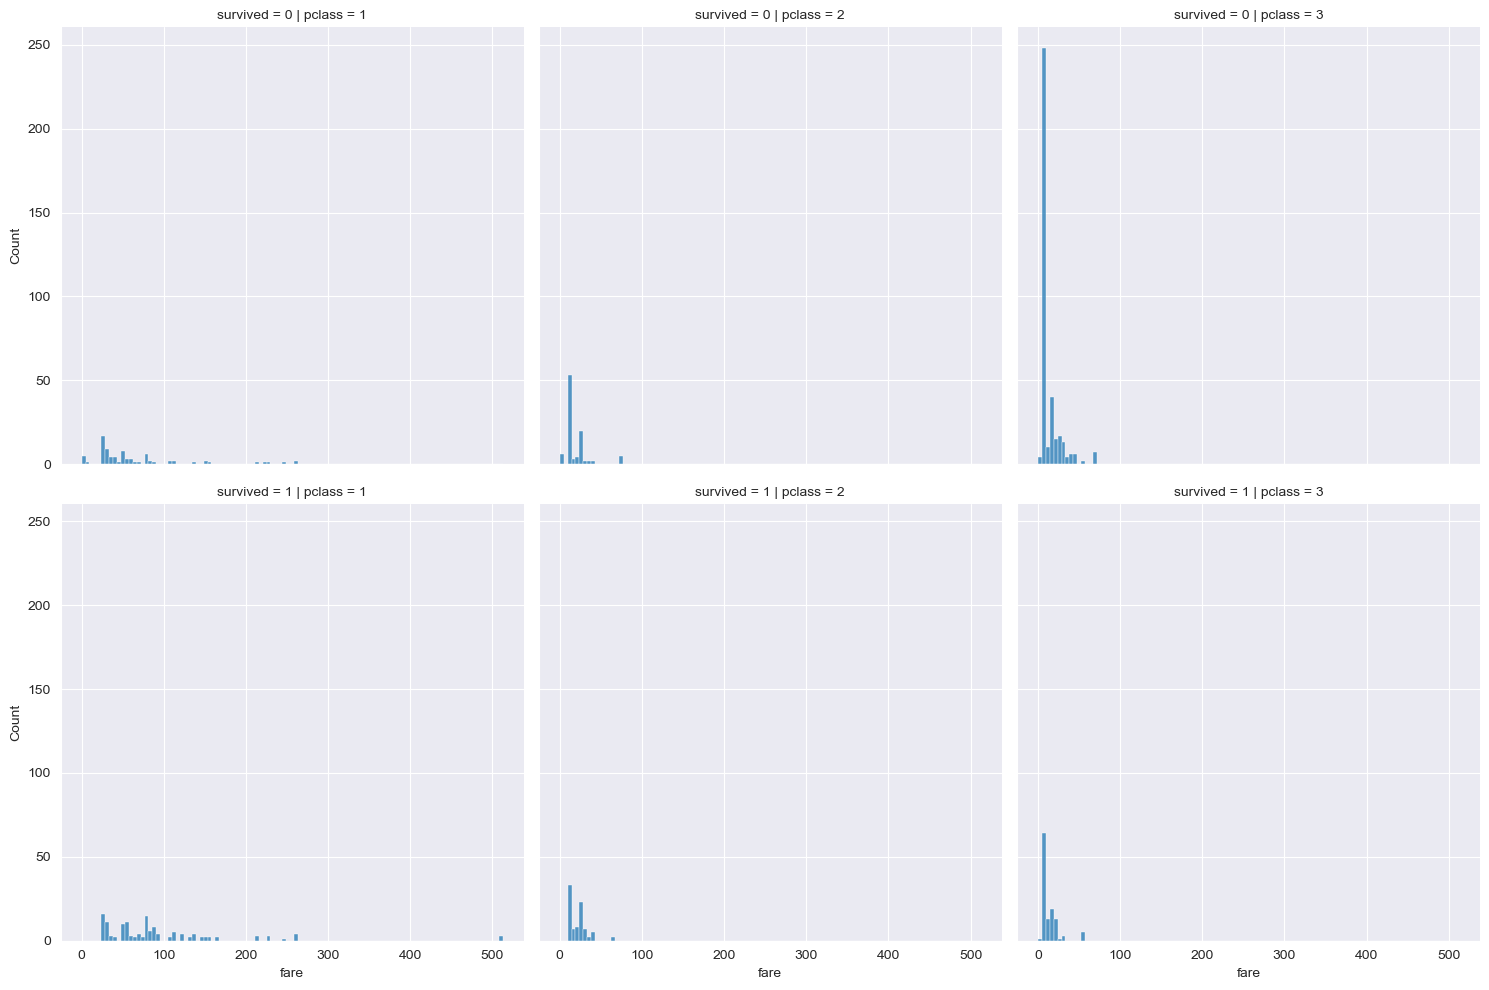

In [130]:
sns.displot(data=titanic, x='fare', col='pclass', row='survived', kind='hist', fill=True)
plt.show()

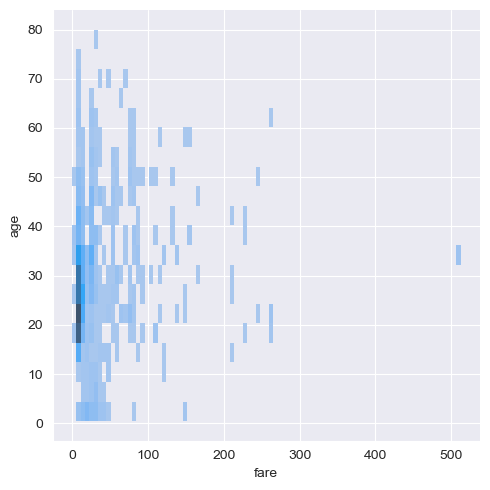

In [142]:
sns.displot(data=titanic, x='fare', y='age', kind='hist')
plt.show()

In [ ]:
## 히트맵 그래프 

In [ ]:
### 피봇 테이블 만들기 

In [148]:
table = titanic.pivot_table(index=['sex'], columns=['pclass'], aggfunc='size')
table

pclass,1,2,3
sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='pclass', ylabel='sex'>

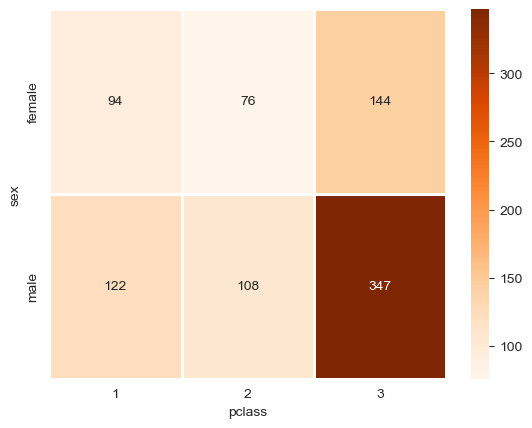

In [218]:
sns.heatmap(table, annot=True, fmt='d', linewidths=1, cmap='Oranges',)

In [208]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

In [ ]:
## violinplot

In [ ]:
#  생존유무, 나이, 성별

In [222]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


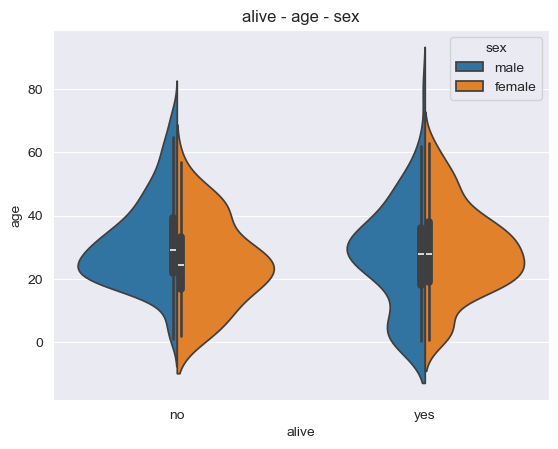

In [233]:
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, split=True)
plt.title('alive - age - sex')
plt.show()

## 조인트그래프
산점도 형태로 표현되나 x, y축에 히스토그램을 같이 표시 

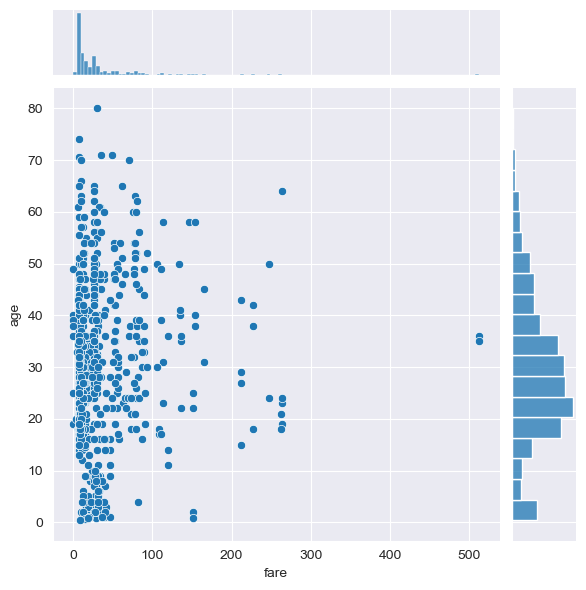

In [243]:
sns.jointplot(x='fare', y='age', data=titanic, ratio=6)
plt.show()

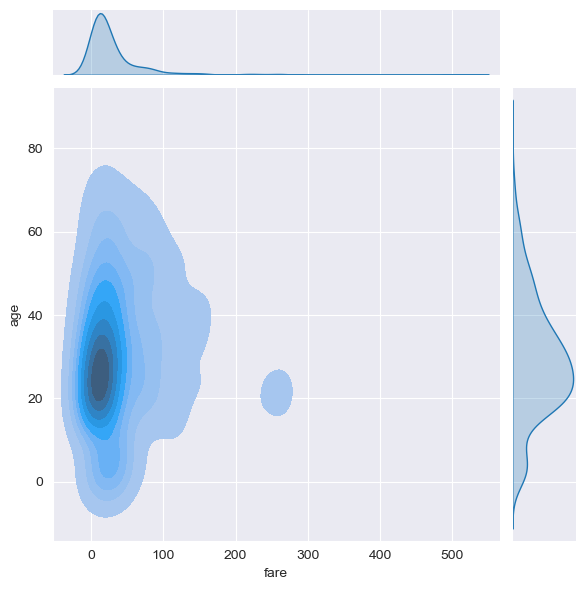

In [249]:
sns.jointplot(x='fare', y='age', data=titanic, kind='kde', fill=True, ratio=6)
plt.show()

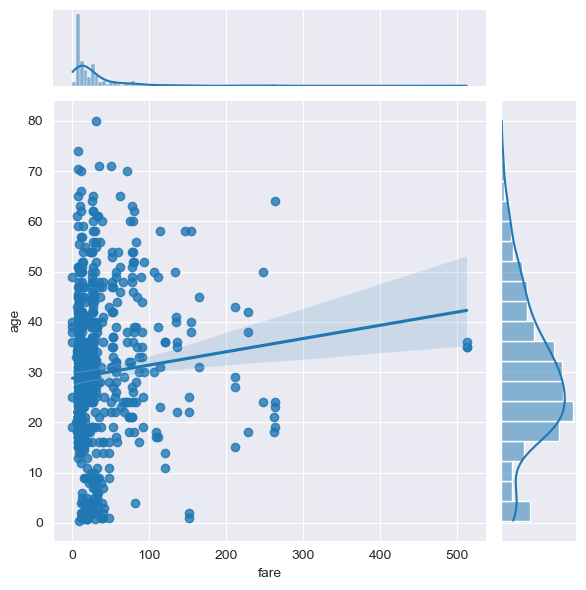

In [255]:
sns.jointplot(x='fare', y='age', data=titanic, kind='reg')
plt.show()

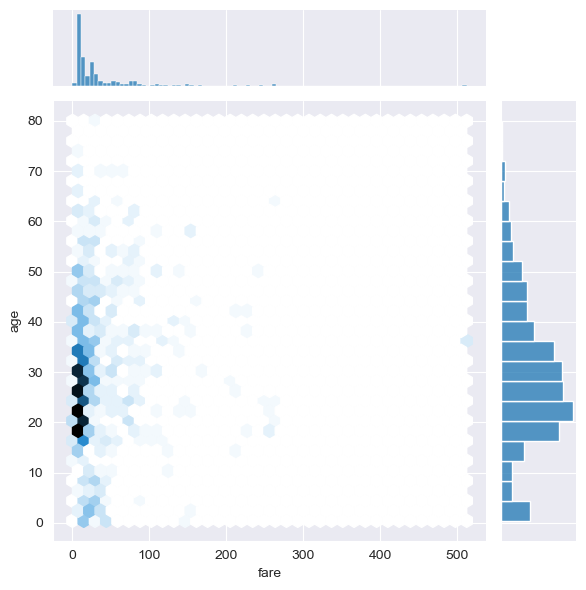

In [261]:
sns.jointplot(x='fare', y='age', data=titanic, kind='hex')
plt.show()